# Crime_data

In [1]:
#importing hierarchical clustering libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage

In [2]:
crime=pd.read_csv('D:/ExcelR/Assignments/Downloaded/Clustering/crime_data.csv')
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


-No null values
-50rows and 5 columns

In [4]:
#Normalization Function
def norm_func(i):
    x=i-i.min()/i.max()-i.min()
    return(x)

In [5]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(crime.iloc[:,1:])

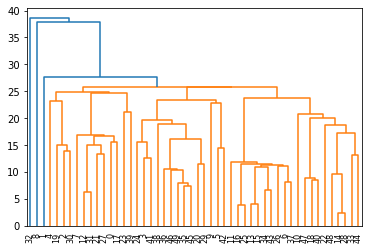

In [6]:
#create dendogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='single'))

In [7]:
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'single')

In [8]:
y_hc=hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [9]:
y_hc

array([0, 3, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [10]:
from sklearn.cluster import KMeans

In [11]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_crime_df = scaler.fit_transform(crime.iloc[:,1:])

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


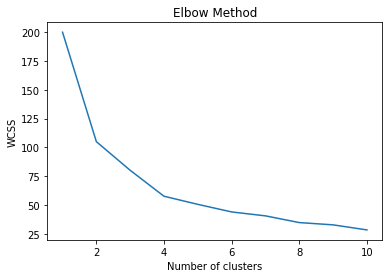

In [12]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_crime_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(scaled_crime_df)

KMeans(n_clusters=4, random_state=42)

In [14]:
clusters_new.labels_

array([1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 3, 1, 3, 2, 0, 2,
       3, 1, 2, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 3, 0])

In [15]:
#Assign clusters to the data set
crime['clusterd_new'] = clusters_new.labels_

In [16]:
#these are standardized values.
clusters_new.cluster_centers_

array([[-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [ 1.42622412,  0.88321132, -0.82279055,  0.01946669],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842]])

In [17]:
crime.groupby('clusterd_new').agg(['mean']).reset_index()

,clusterd_new,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,5.656250,138.875000,73.875000,18.781250
1,1,13.937500,243.625000,53.750000,21.412500
2,2,10.815385,257.384615,76.000000,33.192308
3,3,3.600000,78.538462,52.076923,12.176923


In [18]:
crime.iloc[:,1:].groupby('clusterd_new').mean()

,Murder,Assault,UrbanPop,Rape
clusterd_new,,,,
0,5.656250,138.875000,73.875000,18.781250
1,13.937500,243.625000,53.750000,21.412500
2,10.815385,257.384615,76.000000,33.192308
3,3.600000,78.538462,52.076923,12.176923


In [19]:
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterd_new
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,1


In [20]:
array=crime.values
array

array([['Alabama', 13.2, 236, 58, 21.2, 1],
       ['Alaska', 10.0, 263, 48, 44.5, 2],
       ['Arizona', 8.1, 294, 80, 31.0, 2],
       ['Arkansas', 8.8, 190, 50, 19.5, 1],
       ['California', 9.0, 276, 91, 40.6, 2],
       ['Colorado', 7.9, 204, 78, 38.7, 2],
       ['Connecticut', 3.3, 110, 77, 11.1, 0],
       ['Delaware', 5.9, 238, 72, 15.8, 0],
       ['Florida', 15.4, 335, 80, 31.9, 2],
       ['Georgia', 17.4, 211, 60, 25.8, 1],
       ['Hawaii', 5.3, 46, 83, 20.2, 0],
       ['Idaho', 2.6, 120, 54, 14.2, 3],
       ['Illinois', 10.4, 249, 83, 24.0, 2],
       ['Indiana', 7.2, 113, 65, 21.0, 0],
       ['Iowa', 2.2, 56, 57, 11.3, 3],
       ['Kansas', 6.0, 115, 66, 18.0, 0],
       ['Kentucky', 9.7, 109, 52, 16.3, 3],
       ['Louisiana', 15.4, 249, 66, 22.2, 1],
       ['Maine', 2.1, 83, 51, 7.8, 3],
       ['Maryland', 11.3, 300, 67, 27.8, 2],
       ['Massachusetts', 4.4, 149, 85, 16.3, 0],
       ['Michigan', 12.1, 255, 74, 35.1, 2],
       ['Minnesota', 2.7, 72, 66, 14.9

In [21]:
print(crime.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    50 non-null     object 
 1   Murder        50 non-null     float64
 2   Assault       50 non-null     int64  
 3   UrbanPop      50 non-null     int64  
 4   Rape          50 non-null     float64
 5   clusterd_new  50 non-null     int32  
dtypes: float64(2), int32(1), int64(2), object(1)
memory usage: 2.3+ KB
None


In [22]:
crime1=pd.concat([crime],axis=1)
crime1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterd_new
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,1


##### No of records in cluster 1:

In [23]:
c_0=crime1[(crime1.clusterd_new==0)]
c_0

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterd_new
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
10,Hawaii,5.3,46,83,20.2,0
13,Indiana,7.2,113,65,21.0,0
15,Kansas,6.0,115,66,18.0,0
20,Massachusetts,4.4,149,85,16.3,0
29,New Jersey,7.4,159,89,18.8,0
34,Ohio,7.3,120,75,21.4,0
35,Oklahoma,6.6,151,68,20.0,0
36,Oregon,4.9,159,67,29.3,0


##### No of records in cluster 2:

In [24]:
c_1=crime1[(crime1.clusterd_new==1)]
c_1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterd_new
0,Alabama,13.2,236,58,21.2,1
3,Arkansas,8.8,190,50,19.5,1
9,Georgia,17.4,211,60,25.8,1
17,Louisiana,15.4,249,66,22.2,1
23,Mississippi,16.1,259,44,17.1,1
32,North Carolina,13.0,337,45,16.1,1
39,South Carolina,14.4,279,48,22.5,1
41,Tennessee,13.2,188,59,26.9,1


##### No of records in cluster 3:

In [25]:
c_2=crime1[(crime1.clusterd_new==2)]
c_2

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterd_new
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
8,Florida,15.4,335,80,31.9,2
12,Illinois,10.4,249,83,24.0,2
19,Maryland,11.3,300,67,27.8,2
21,Michigan,12.1,255,74,35.1,2
24,Missouri,9.0,178,70,28.2,2
27,Nevada,12.2,252,81,46.0,2


##### No of records in cluster 4:

In [26]:
c_3=crime1[(crime1.clusterd_new==3)]
c_3

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterd_new
11,Idaho,2.6,120,54,14.2,3
14,Iowa,2.2,56,57,11.3,3
16,Kentucky,9.7,109,52,16.3,3
18,Maine,2.1,83,51,7.8,3
22,Minnesota,2.7,72,66,14.9,3
25,Montana,6.0,109,53,16.4,3
26,Nebraska,4.3,102,62,16.5,3
28,New Hampshire,2.1,57,56,9.5,3
33,North Dakota,0.8,45,44,7.3,3
40,South Dakota,3.8,86,45,12.8,3


#### CONCLUSION:- here c_0,c_1,c_2,c_3,and c_4 are the four different clusters with different records in it.